In [1]:
import numpy as np
import pandas as pd

As a data example, we will use the sudoku experiment data where you were asked to solve a sudoku that should be filled in with either Greek or Latin letters.

# Loading and looking at our data

Understanding our data is essential for any application. 

- What are our variables, 
- what do they represent,
- what are reasonable values,
- which types are they?
    - string, float, int, Boolean

In [2]:
df = pd.read_csv('responses.csv', delimiter = ",") # read in the data and print it
df # Note that the first line of the csv-file is interpreted as variable names (which fits in this case!). 

,Unnamed: 0,type,exp,cor,diff,hour,sec,min
0,1,Latin,"Yes, No","Yes, No",5,17,68.0,3
1,2,Greek,Yes,No,10,17,4.0,6
2,3,Latin,No,Yes,5,20,54.0,9
3,4,Greek,Yes,Yes,3,20,11.0,4
4,5,Latin,Yes,Yes,1,20,5.0,8
5,6,Greek,Yes,Yes,3,20,NaN,NaN
6,7,Latin,Yes,No,10,20,NaN,NaN
7,8,Greek,No,No,7,20,9.0,8
8,9,Latin,Yes,Yes,10,20,NaN,NaN
9,10,Latin,Yes,Yes,6,20,NaN,idn’t do the sudoku but the instructions seem ...


In [3]:
df.dtypes # get data types of each column of the data frame (object is string)

Unnamed: 0      int64
type           object
exp            object
cor            object
diff            int64
hour            int64
sec           float64
min            object
dtype: object

In [4]:
df['min'] = pd.to_numeric(df['min'], errors = 'coerce') # change min from string to numeric
df

,Unnamed: 0,type,exp,cor,diff,hour,sec,min
0,1,Latin,"Yes, No","Yes, No",5,17,68.0,3.0
1,2,Greek,Yes,No,10,17,4.0,6.0
2,3,Latin,No,Yes,5,20,54.0,9.0
3,4,Greek,Yes,Yes,3,20,11.0,4.0
4,5,Latin,Yes,Yes,1,20,5.0,8.0
5,6,Greek,Yes,Yes,3,20,NaN,NaN
6,7,Latin,Yes,No,10,20,NaN,NaN
7,8,Greek,No,No,7,20,9.0,8.0
8,9,Latin,Yes,Yes,10,20,NaN,NaN
9,10,Latin,Yes,Yes,6,20,NaN,NaN


In [5]:
df['time'] = df['min']*60 + df.sec # make a time variable
df

,Unnamed: 0,type,exp,cor,diff,hour,sec,min,time
0,1,Latin,"Yes, No","Yes, No",5,17,68.0,3.0,248.0
1,2,Greek,Yes,No,10,17,4.0,6.0,364.0
2,3,Latin,No,Yes,5,20,54.0,9.0,594.0
3,4,Greek,Yes,Yes,3,20,11.0,4.0,251.0
4,5,Latin,Yes,Yes,1,20,5.0,8.0,485.0
5,6,Greek,Yes,Yes,3,20,NaN,NaN,NaN
6,7,Latin,Yes,No,10,20,NaN,NaN,NaN
7,8,Greek,No,No,7,20,9.0,8.0,489.0
8,9,Latin,Yes,Yes,10,20,NaN,NaN,NaN
9,10,Latin,Yes,Yes,6,20,NaN,NaN,NaN


## Summaries

Summary statistics can help us understand the data (and also clean it).

In [6]:
df.shape # size of data (number of (rows,columns) - recall, Python is zero-indexed)

(10, 9)

In [7]:
df[0:4] # print the first observations

,Unnamed: 0,type,exp,cor,diff,hour,sec,min,time
0,1,Latin,"Yes, No","Yes, No",5,17,68.0,3.0,248.0
1,2,Greek,Yes,No,10,17,4.0,6.0,364.0
2,3,Latin,No,Yes,5,20,54.0,9.0,594.0
3,4,Greek,Yes,Yes,3,20,11.0,4.0,251.0


In [8]:
df.describe() # numerical overview of each variable, by default only numeric types

,Unnamed: 0,diff,hour,sec,min,time
count,10.00000,10.000000,10.000000,6.000000,6.000000,6.000000
mean,5.50000,6.000000,19.400000,25.166667,6.333333,405.166667
std,3.02765,3.231787,1.264911,28.223513,2.422120,140.870745
min,1.00000,1.000000,17.000000,4.000000,3.000000,248.000000
25%,3.25000,3.500000,20.000000,6.000000,4.500000,279.250000
50%,5.50000,5.500000,20.000000,10.000000,7.000000,424.500000
75%,7.75000,9.250000,20.000000,43.250000,8.000000,488.000000
max,10.00000,10.000000,20.000000,68.000000,9.000000,594.000000


In [9]:
df.describe(include = 'all')

,Unnamed: 0,type,exp,cor,diff,hour,sec,min,time
count,10.00000,10,10,10,10.000000,10.000000,6.000000,6.000000,6.000000
unique,NaN,2,3,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Latin,Yes,Yes,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,7,6,NaN,NaN,NaN,NaN,NaN
mean,5.50000,NaN,NaN,NaN,6.000000,19.400000,25.166667,6.333333,405.166667
std,3.02765,NaN,NaN,NaN,3.231787,1.264911,28.223513,2.422120,140.870745
min,1.00000,NaN,NaN,NaN,1.000000,17.000000,4.000000,3.000000,248.000000
25%,3.25000,NaN,NaN,NaN,3.500000,20.000000,6.000000,4.500000,279.250000
50%,5.50000,NaN,NaN,NaN,5.500000,20.000000,10.000000,7.000000,424.500000
75%,7.75000,NaN,NaN,NaN,9.250000,20.000000,43.250000,8.000000,488.000000


In [10]:
df['exp'].value_counts() # get counts for categorical data

Yes        7
No         2
Yes, No    1
Name: exp, dtype: int64

# Data cleaning

When we first start working with a data set, we will need to consider if some data points should be dropped from the analysis - these could be data points that have been entered wrongly or are outliers. We should take some care in terms of outliers to not remove valid and important data.

Some things that we can check:

- seconds should be in [0,60],
- only one option should be ticked in 'Experience',
- there should be no missing values,
- there should be no extreme values (outliers).

For each issue, we can remove the data point altogether, or just remove the problematic value (or fix it if possible) - all this will be context-specific.

The following are pieces of code that can help us clean the data.

In [11]:
df.loc[df['exp'] == 'No']
df.loc[df['exp'] != 'No']
df.loc[df['exp'].isin(['Yes','No'])]
df.loc[~df['exp'].isin(['Yes','No'])]

#df['exp'].loc[~df['exp'].isin(['Yes','No'])] = np.nan
#df.loc[~df['exp'].isin(['Yes','No']),'exp'] = np.nan

,Unnamed: 0,type,exp,cor,diff,hour,sec,min,time
0,1,Latin,"Yes, No","Yes, No",5,17,68.0,3.0,248.0


In [12]:
df

,Unnamed: 0,type,exp,cor,diff,hour,sec,min,time
0,1,Latin,"Yes, No","Yes, No",5,17,68.0,3.0,248.0
1,2,Greek,Yes,No,10,17,4.0,6.0,364.0
2,3,Latin,No,Yes,5,20,54.0,9.0,594.0
3,4,Greek,Yes,Yes,3,20,11.0,4.0,251.0
4,5,Latin,Yes,Yes,1,20,5.0,8.0,485.0
5,6,Greek,Yes,Yes,3,20,NaN,NaN,NaN
6,7,Latin,Yes,No,10,20,NaN,NaN,NaN
7,8,Greek,No,No,7,20,9.0,8.0,489.0
8,9,Latin,Yes,Yes,10,20,NaN,NaN,NaN
9,10,Latin,Yes,Yes,6,20,NaN,NaN,NaN


In [13]:
#df.loc[df['sec'] > 60]
#df.loc[df['sec'] > 60,'sec'] = np.nan
#df

# Visualization

Visualization of data can help us understand it - which types of visualization that are meaningful will depend on the variables, e.g., their types.

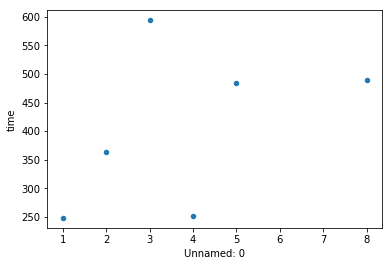

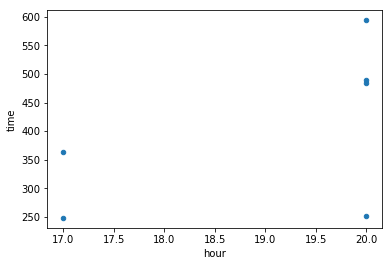

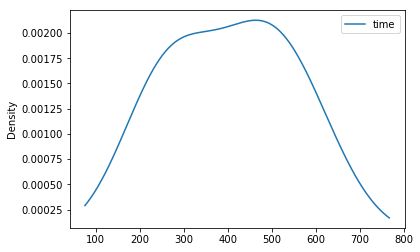

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# numeric data
df.plot(x = 'Unnamed: 0', y = 'time', kind = 'scatter') # scatter plot 
df.plot(x = 'hour', y = 'time', kind = 'scatter')
df.plot(y = 'time', kind = 'density') # density plot


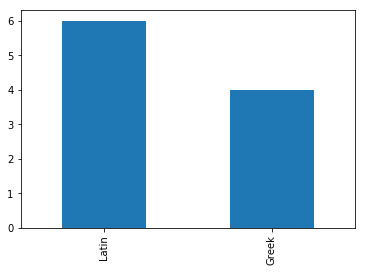

In [15]:
# categorical data (a visualization of the frequence table from before)
df['type'].value_counts().plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F121C2A90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000017F121D7F60>], dtype=object)

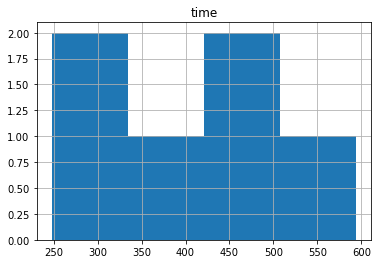

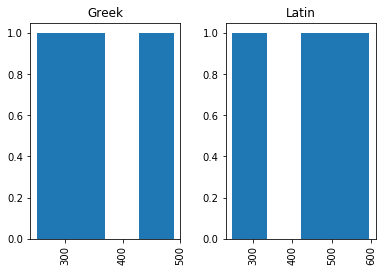

In [16]:
# histogram of numerical data
df.hist(column = 'time', bins = 4)
df.hist(column = 'time', bins = 4, by = 'type') # split by Sudoku type

### TASK 1 
Clean the data: identify the data points for which there are issues and remove them. Also, look for outliers: do some data points look suspicious, though they are maybe not impossible. Keep the outliers in the cleaned data set. Use summaries, plots, logic, and your imagination. Make visualizations of the clean data.

# Fitting a model

Next week, we'll talk more about linear regression and fitting a model. This week we simply think of a model as a piece of code that takes some data as input outputs a prediction, in our case it takes the variables that describe the participant in our experiment (e.g., exp, hour) and output a prediction of time, how long it will take the participant to solve the sudoku. This model is fit to data, i.e., from data it learns how to make such predictions.

In [17]:
import statsmodels.formula.api as sm

df = df.dropna() # remove all data points with missing values

result = sm.ols(formula="time ~ diff", data=df).fit()
print(result.params)
print(result.summary())


Intercept    410.368601
diff          -1.006826
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.249
Method:                 Least Squares   F-statistic:                  0.001997
Date:                Sun, 18 Apr 2021   Prob (F-statistic):              0.967
Time:                        08:19:55   Log-Likelihood:                -37.652
No. Observations:                   6   AIC:                             79.30
Df Residuals:                       4   BIC:                             78.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------

C:\Users\swmo\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n))


In [18]:
[method_name for method_name in dir(result) if callable(getattr(result, method_name))] # see which methods are available for this object

['_HCCM',
 '__class__',
 '__delattr__',
 '__dir__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_get_robustcov_results',
 '_is_nested',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'conf_int',
 'conf_int_el',
 'cov_params',
 'el_test',
 'f_test',
 'get_influence',
 'get_robustcov_results',
 'initialize',
 'load',
 'outlier_test',
 'predict',
 'remove_data',
 'save',
 'summary',
 'summary2',
 't_test',
 'wald_test']

In [19]:
newdata = {'time':[np.nan]*10,
        'diff':list(range(1,11))}
  
# Create DataFrame
newdf = pd.DataFrame(newdata)
newdf
newdf['time'] = result.predict(newdf)

We will visualize predictions from the model to understand what it actually does.

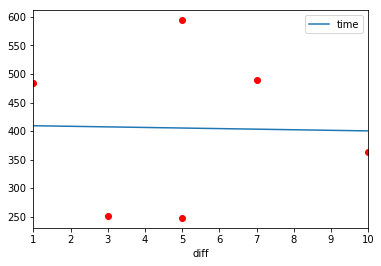

In [20]:
newdf
newdf.plot(x = 'diff', y = 'time')

# scatter plot with predictions in blue and data in red
ax = plt.subplot(1, 1, 1)
ax.scatter(df['diff'], df['time'], color = "red") 

We will now make a more flexible model. Above time is modelled as a linear function (intercept and slope) of diff.

In [21]:
from patsy import dmatrix

# Fit a more flexible model
diff_cubic = dmatrix('bs(x, knots=())', {'x': df['diff']})
result_cubic = sm.GLM(df['time'], diff_cubic).fit()

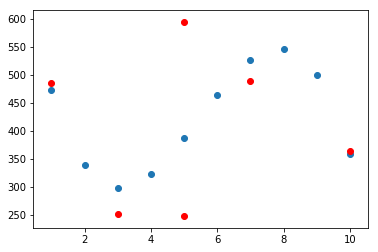

In [22]:
newdiff_cubic = dmatrix('bs(x, knots=())', {'x': newdf['diff']})


plt.figure()
plt.scatter(x = newdf['diff'], y = result_cubic.predict(newdiff_cubic))

ax = plt.subplot(1, 1, 1)
ax.scatter(df['diff'], df['time'], color = "red") 

If we think of data (time) as being composed of some signal (some information contained in what we know about the participant) and some random variation, a more flexible model may 'overfit', essentially describe the noise too well and this means that it will perhaps predict worse than simpler models on new data. We can prevent this by data splitting: divide our data set into two and fit on one and test on the other.

### TASK 2
Make a test-training split of the data. You now have two data sets X1 (training) and X2 (test). Above we have two models, M1 and M2 (the linear and the cubic model). Fit both of the above models to the X1 data. Then use these models to predict the time values of the X2 data to obtain predictions P1 (from M1) and P2 (from M2) using the diff variable in X2. Finally, compute

(1/n)sum((P1 - T)^2) and (1/n)sum((P2 - T)^2)

where T is the time variable in X2 and n is the number of rows in X2. Above we have made predictions for arbitrary values of diff, but not that you need to do it the diff values in X2. 


## Other models

In [28]:
result = sm.ols(formula="time ~ type", data=df).fit()
print(result.params)
result = sm.ols(formula="time ~ type + diff", data=df).fit()
print(result.params)

Intercept        368.000000
type[T.Latin]     74.333333
dtype: float64
Intercept        314.163522
type[T.Latin]     98.559748
diff               8.075472
dtype: float64


# Spam detection (example)

The following data set is described in the paper

Almeida, T.A., Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.

In [23]:
df = pd.read_csv('SMSSpamCollection.txt', delimiter = "\t", names=['s','t'])

In [24]:
df

,s,t
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [27]:
list(df)

['s', 't']

We want to generate some features of each text message which allow us to model the probability of the message being spam. We generate the length of the text message and the lenght of the first group of uppercase letters. Another idea could be the number of special characters or the number of uppercase letters within the first n symbols of the message (or in the entire message).

In [28]:
import re
df['l'] = df['t'].str.len()
df['f'] = df.t.str.extract('([A-Z_]+)')
df['fl'] = df['f'].str.len()
df2 = df.t.str.extractall('([A-Z_]+)') # note that this is a data frame with hierarchical indexing


C:\Users\swmo\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


In [29]:
df2.index.names = ['text','no']
df2

0
text no          
0    0          G
     1          A
     2          C
1    0          O
     1          J
2    0          F
     1         FA
     2          C
     3          M
     4          T
     5         FA
     6          T
     7          C
3    0          U
     1          U
4    0          N
     1          I
5    0          F
     1          M
     2          H
     3          I
     4          T
     5          X
     6          X
6    0          E
     1          T
7    0          A
     1          M
     2          M
     3          O
...           ...
5558 0          S
     1          I
5560 0          A
     1          J
5561 0          G
     1          M
     2     BORING
5562 0          O
     1          S
     2          I
5563 0          A
5564 0          W
5565 0          H
5566 0   REMINDER
     1       FROM
     2          O
     3          T
5567 0          T
     1          U
     2          P
     3        NOW
     4          O
     5         BT
5568 0          W
5569 0          P
     1          S
5570 0          T
     1          I
5571 0          R
     1          I

[19324 rows x 1 columns]

In [30]:
df['uc'] = df2.groupby(level=[0]).sum()
df['ucl'] = df['uc'].str.len()

In [31]:
list(df)

['s', 't', 'l', 'f', 'fl', 'uc', 'ucl']

In [32]:
df

,s,t,l,f,fl,uc,ucl
0,ham,"Go until jurong point, crazy.. Available only ...",111,G,1.0,GAC,3.0
1,ham,Ok lar... Joking wif u oni...,29,O,1.0,OJ,2.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,F,1.0,FFACMTFATC,10.0
3,ham,U dun say so early hor... U c already then say...,49,U,1.0,UU,2.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,N,1.0,NI,2.0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,F,1.0,FMHITXX,7.0
6,ham,Even my brother is not like to speak with me. ...,77,E,1.0,ET,2.0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,A,1.0,AMMOMNVCPC,10.0
8,spam,WINNER!! As a valued network customer you have...,157,WINNER,6.0,WINNERATCKLV,12.0
9,spam,Had your mobile 11 months or more? U R entitle...,154,H,1.0,HURUFCTMUCFREE,14.0


Then we generate the ratio of the two.

In [38]:
df['ucr'] = df['ucl'].div(df['l'])
df[['ucr', 'ucl', 'l']]

,ucr,ucl,l
0,0.027027,3.0,111
1,0.068966,2.0,29
2,0.064516,10.0,155
3,0.040816,2.0,49
4,0.032787,2.0,61
5,0.047619,7.0,147
6,0.025974,2.0,77
7,0.062500,10.0,160
8,0.076433,12.0,157
9,0.090909,14.0,154


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000269C6A6BBA8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000269C6ABFF60>], dtype=object)

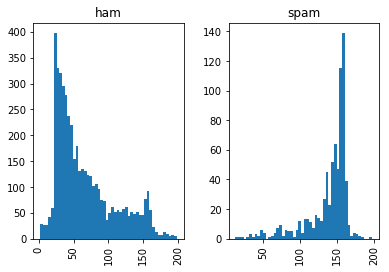

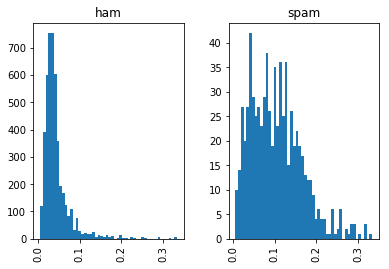

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
df[df.l < 200].hist(column = 'l', bins = 50, by = 's')
df[df.ucr < .35].hist(column = 'ucr', bins = 50, by = 's')

### TASK 3
Find other features that may be predictive of spam (for instance, as indicated by histograms).